In [14]:
from ROOT import TFile, TCanvas, TH1D, TH2D, TF1, gPad , gStyle, TGraph, TGraphErrors, gROOT, TColor
import numpy as np
import math
c1=TCanvas("Calo Plots", "CaloPlots", 800, 1200)
c1.Divide(1, 2)
c1.cd(1)
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571951573.root", "READ")
RAWdata=importFile.Get("RECOdata")
#RAWdata.Print()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


In [15]:
importFile.ls()

TFile**		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571951573.root	
 TFile*		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571951573.root	
  OBJ: TTree	RECOdata	BL4S RECO data tree : 0 at: 0x587bbc0
  KEY: TTree	RAWdata;1	BL4S RAW data tree
  KEY: TTree	RECOdata;1	BL4S RECO data tree


Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist2 (Potential memory leak).


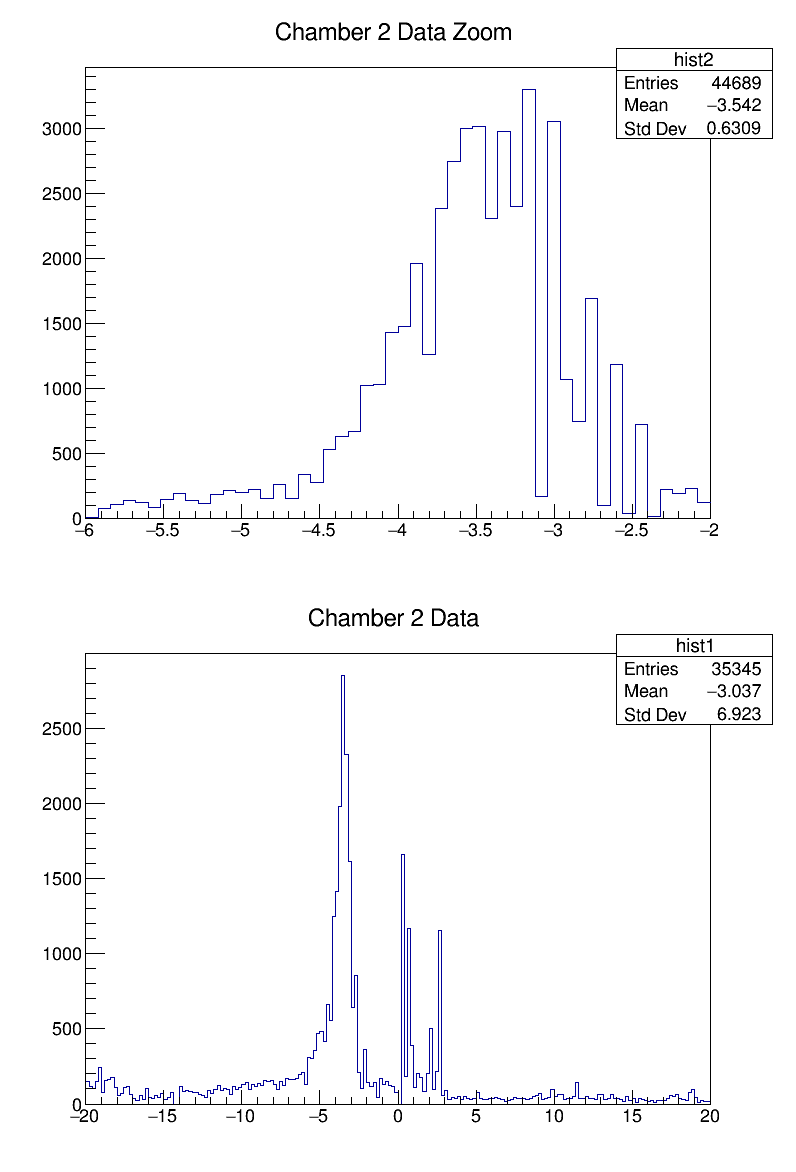

In [24]:
#importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572012186.root", "READ")
#RAWdata=importFile.Get("RAWdata")
#hist=TH1D("MMFE82/3", "title", 100, -500, 500)
#for event in RAWdata:
#    for i in range(0, event.NMMFE8_02_hitChannel):
#        hist.Fill(event.MMFE8_02_hitChannel[i])  
#    for i in range(0, event.NMMFE8_03_hitChannel):
#        hist.Fill(event.MMFE8_03_hitChannel[i])

#RAWdata.Draw("Chamber2_position") #Draw the histogram to get the hits counts for each of the
c1.cd(2)
hist1=TH1D("hist1", "Chamber 2 Data", 200, -20, 20)
hist2=TH1D("hist2", "Chamber 2 Data Zoom", 50, -6, -2)

noisyStrips=dict()
for event in RAWdata:
    for j in range(0, event.NChamber2_position):
        try:
            noisyStrips[event.Chamber2_position[j]]+=1
        except:
            noisyStrips[event.Chamber2_position[j]]=1

mean=np.mean([i for i in noisyStrips.values()])
noisyLevel=30

for Key in noisyStrips.keys():
    if noisyStrips[Key] > mean*noisyLevel:
        noisyStrips[Key]=False
    else:
        noisyStrips[Key]=True

for event in RAWdata:
    for j in range(0, event.NChamber2_position):
        if noisyStrips[event.Chamber2_position[j]] and abs(event.Chamber2_position[j])<20:
            hist1.Fill(event.Chamber2_position[j])
hist1.Draw()

c1.cd(1)
RAWdata.Draw("Chamber2_position>>hist2", "Chamber2_position>-6 && Chamber2_position<-2")
#hist2.Fit("landau")
hist2.Draw("colz")

c1.Draw()

In [ ]:
RAWdata.Show(100)